<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



## Task 2

#### Import the required libraries we need for the lab.


In [84]:
import piplite
await piplite.install(['numpy','pandas','seaborn'],['statsmodels', 'scipy'])
#await piplite.install()

In [85]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [86]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [87]:
import pandas as pd
boston_df=pd.read_csv(boston_url, nrows=500)

In [88]:
import sys
sys.getsizeof(boston_df)  # Check dataset size

56088

#### Add your code below following the instructions given in the course to complete the peer graded assignment


#### 1.Boxplot for Median Value of Owner-Occupied Homes (MEDV) (BoxPlot)

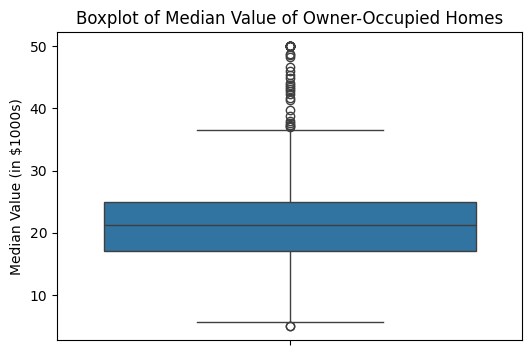

In [89]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.ylabel('Median Value (in $1000s)')
plt.show()

#### 2. Bar plot for Charles River variable (CHAS)

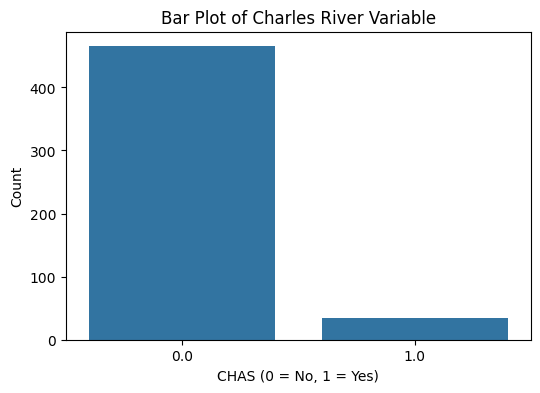

In [90]:
plt.figure(figsize=(6, 4))
sns.countplot(x=boston_df['CHAS'])
plt.title('Bar Plot of Charles River Variable')
plt.xlabel('CHAS (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

#### 3. Boxplot for MEDV vs AGE (Grouped by Age Categories)

<ipython-input-91-a1fbf9545f78>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=boston_df['AGE_GROUP'], y=boston_df['MEDV'], palette="pastel")


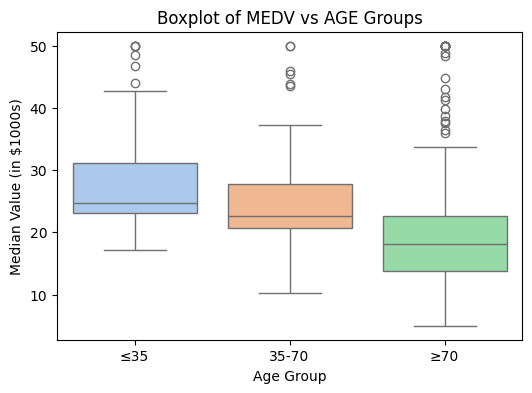

In [91]:
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['≤35', '35-70', '≥70'])

plt.figure(figsize=(6, 4))
sns.boxplot(x=boston_df['AGE_GROUP'], y=boston_df['MEDV'], palette="pastel")
plt.title('Boxplot of MEDV vs AGE Groups')
plt.xlabel('Age Group')
plt.ylabel('Median Value (in $1000s)')
plt.show()

#### 4.Scatter plot for NOX vs INDUS

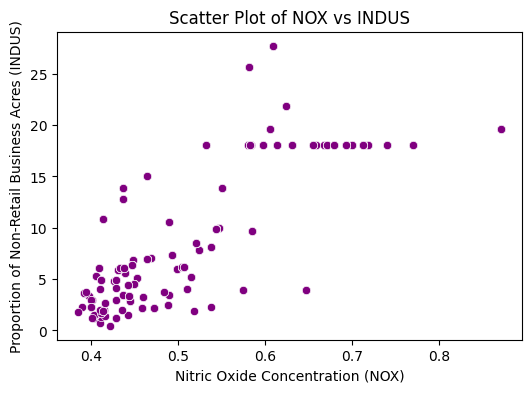

In [92]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=boston_df['NOX'], y=boston_df['INDUS'],color='Purple')
plt.title('Scatter Plot of NOX vs INDUS')
plt.xlabel('Nitric Oxide Concentration (NOX)')
plt.ylabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.show()

#### 5.Histogram for Pupil-Teacher Ratio (PTRATIO)

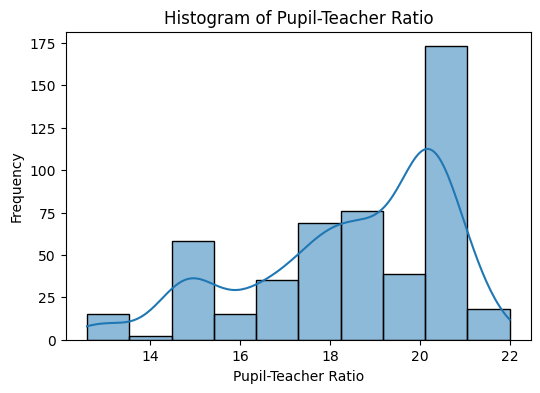

In [93]:
plt.figure(figsize=(6, 4))
sns.histplot(boston_df['PTRATIO'], bins=10, kde=True)
plt.title('Histogram of Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

## Task 3: Use the appropriate tests to answer the questions provided.

### 1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

####  T-test: Median Home Value and Charles River Proximity
   * T-statistic: 3.113
   * P-value: 0.00357
   * Conclusion: Since  𝑝<0.05, we reject the null hypothesis. There is a significant difference in the median home value between houses 
near the Charles River and those that are not.

### 2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

#### ANOVA: Difference in Median Home Value Across Age Groups
    P-value: 1.71×10−15
    Conclusion: Since p<0.05, we reject the null hypothesis. There is a significant difference in median home values across different age groups.

### 3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?(Pearson Correlation)

#### Pearson Correlation: Relationship Between NOX and INDUS
    Correlation coefficient: 0.764
    P-value: 7.91×10−98
    Conclusion: Since p<0.05, we reject the null hypothesis. There is a strong positive correlation between nitric 
oxide concentration and non-retail business acres, indicating that industrial zones tend to have higher pollution levels.

### 4.What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

#### Regression Analysis: Impact of Distance to Employment Centers on Home Value
     P-value for DIS: 1.21×10−8
     Regression Equation:
         MEDV=18.39+1.09×DIS
     Conclusion: Since 𝑝<0.05, we reject the null hypothesis. There is a statistically significant positive relationship between distance to employment centers and home values, meaning homes farther from employment centers tend to have higher values.
